<a href="https://colab.research.google.com/github/Shinu31/python/blob/main/Assignment_Find_k_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Net_class.csv')

In [2]:
data.info()

NameError: name 'data' is not defined

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])

data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [12]:
x = data[['Gender','Age','EstimatedSalary']]
y = data['Purchased']

In [17]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.20)
x_train.head(),y_train.head()




(     Gender  Age  EstimatedSalary
 284       1   48           141000
 63        1   32           120000
 278       0   52            38000
 15        1   29            80000
 64        0   59            83000,
 284    0
 63     1
 278    1
 15     0
 64     0
 Name: Purchased, dtype: int64)

### Check training data score without scaling


In [18]:

from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)*100

84.6875

In [22]:
knn.score(x_test,y_test)*100

91.25

# Without scaling

In [24]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [25]:
display(y_test,y_pred)

,Purchased
162,0
325,0
105,0
157,0
335,0
...,...
240,1
150,0
176,0
171,0


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [26]:
#print('Accuracy is:',model.score(X_train,y_train))#98.33
print('Accuracy is:',knn.score(x_test,y_pred))# for predicted output accuracy is always 100

Accuracy is: 1.0


In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[48  1]
 [ 6 25]]


Text(50.58159722222221, 0.5, 'Actual')

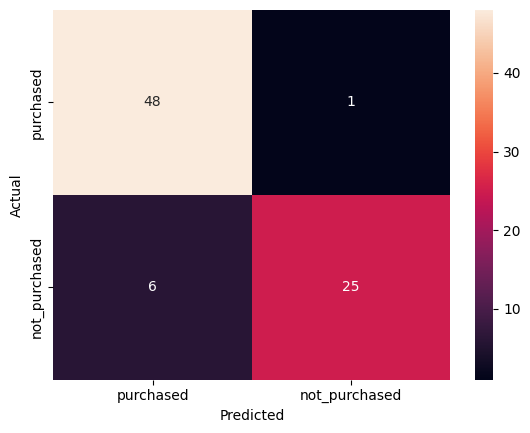

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,
           xticklabels=['purchased','not_purchased'],yticklabels=['purchased','not_purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [29]:
# check actual records of class 0
sum(y_test == 0)

49

In [30]:
#actual
sum(y_test == 1)

31

In [31]:
#predicted
sum(y_pred == 0)

54

In [32]:
sum(y_pred==1)

26

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        49
           1       0.96      0.81      0.88        31

    accuracy                           0.91        80
   macro avg       0.93      0.89      0.90        80
weighted avg       0.92      0.91      0.91        80



In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score,r2_score

In [37]:
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('for k value:',i,'precision is:',precision_score(y_test,y_pred,average='weighted'))

for k value: 1 precision is: 0.8383012820512821
for k value: 2 precision is: 0.886441647597254
for k value: 3 precision is: 0.8635416666666668
for k value: 4 precision is: 0.8673527037933818
for k value: 5 precision is: 0.9170405982905983
for k value: 6 precision is: 0.8767829153605016
for k value: 7 precision is: 0.8907941595441595
for k value: 8 precision is: 0.8795081967213114
for k value: 9 precision is: 0.8421875
for k value: 10 precision is: 0.896186440677966


In [39]:
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]  # list for f1_score
k_list=[] # list for K value
for k in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    f=f1_score(y_test,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

In [40]:
#number of clusters
k_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [41]:
# f1_score for clusters 1-10
print(f1_list)

[0.8228581161641968, 0.8602375960866526, 0.8559973817705776, 0.829059829059829, 0.9046159087037984, 0.8448245459354611, 0.8773633111905978, 0.8254545454545454, 0.8199134199134199, 0.8575498575498576]


In [42]:
max(f1_list)

0.9046159087037984

In [45]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 5  with F1-Score= 0.9046159087037984


Text(0.5, 1.0, 'K neigbours vs f1_score')

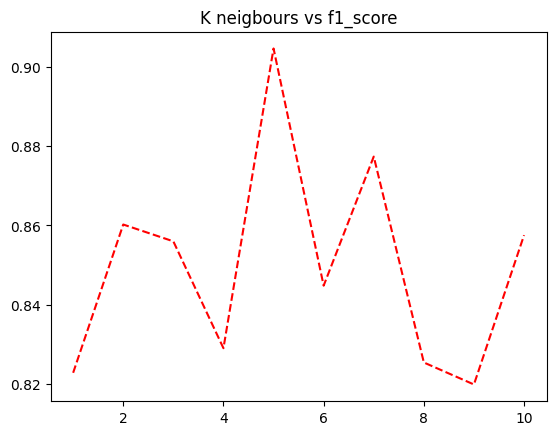

In [46]:
plt.plot(k_list,f1_list,'r--')
plt.title('K neigbours vs f1_score')

With feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)


StandardScaler()

In [49]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
x_train[:3]

array([[ 1.        ,  1.0046577 ,  2.13302961],
       [ 1.        , -0.54376115,  1.51192037],
       [-1.        ,  1.39176241, -0.91336332]])

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [52]:
model.score(x_train,y_train)*100

91.5625

In [53]:
model.score(x_test,y_test)*100

91.25

In [54]:
y_pred = model.predict(x_test)


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])